# <span style="color:blue"> Projeto 01 - Concessão de cartões de crédito </span>
<span style="color:blue"> Este notebook é semelhante ao visto em vídeo, mas contém células azuis como esta, que trazem instruções para a sua atividade.</span>

<span style="color:blue">Após realizar as tarefas indicadas, você vai fazer o upload do seu arquivo no GitHub e enviar o link para a EBAC, ou alternativamente, fazer o upload do arquivo na plataforma da EBAC. Recomendamos o github, pois assim você já vai montando o seu portfólio.</span>

## Etapa 1 CRISP - DM: Entendimento do negócio

Como primeira etapa do CRISP-DM, vamos entender do que se trata o negócio, e quais os objetivos. 

Este é um problema de concessão de cartões de crédito, publicado no [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).  
  
Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

- Objetivos do negócio
Note que o objetivo aqui é que o modelo sirva o mutuário (o cliente) para que avalie suas próprias decisões, e não a instituição de crédito.
- Objetivos da modelagem
O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.
  
Nessa etapa também se avalia a situação da empresa/segmento/assunto de modo a se entender o tamanho do público, relevância, problemas presentes e todos os detalhes do processo gerador do fenômeno em questão, e portanto dos dados.

Também é nessa etapa que se constrói um planejamento do projeto.

## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa é o entendimento dos dados. Foram fornecidas 15 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.

#### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
# Observe que demo01.csv está na mesma pasta que este notebook
# do contrário, seria necessário indicar a pasta no nome do arquivo
df = pd.read_csv('demo01.csv')
print ("Número de linhas e colunas da tabela: {}".format(df.shape))

df.head()

Número de linhas e colunas da tabela: (16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. Nesta demonstração vamos ver a variável resposta e dois exemplos de univariada apenas. Mas sinta-se à vontade para tentar observar outras variáveis.

In [28]:
print(df.shape)
print(df.dtypes)

(16650, 16)
sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object


> tipos dos dados e totais

In [33]:
print(df['mau'].value_counts(), end='\n\n')

df_ad, columns = df[df['mau'] == False].shape
df_in, columns = df[df['mau'] == True].shape

percent_ad = round((100 * df_ad) / df['mau'].count(), 2)
percent_in = round((100 * df_in) / df['mau'].count(), 2)

print(f"Porcentagem Adimplentes: {percent_ad}")
print(f"Porcentagem Inadimplentes: {percent_in}", end='\n\n')

print(f"Taxa de inadimplentes: {df['mau'].mean() * 100}")

False    16260
True       390
Name: mau, dtype: int64

Porcentagem Adimplentes: 97.66
Porcentagem Inadimplentes: 2.34

Taxa de inadimplentes: 2.3423423423423424


In [39]:
print(f"{df.select_dtypes('object').describe().transpose()}")

                  count unique                            top   freq
sexo              16650      2                              F  11201
posse_de_veiculo  16650      2                              N  10178
posse_de_imovel   16650      2                              Y  11176
tipo_renda        16650      5                        Working   8565
educacao          16650      5  Secondary / secondary special  11245
estado_civil      16650      5                        Married  11680
tipo_residencia   16650      6              House / apartment  14974


In [43]:
print(f"{df.select_dtypes('number').describe().transpose()}")

                         count        mean         std          min  \
qtd_filhos             16650.0    0.433153    0.739395     0.000000   
idade                  16650.0   44.319513   11.228837    22.030137   
tempo_emprego          16650.0 -161.416446  376.843912 -1000.665753   
possui_celular         16650.0    1.000000    0.000000     1.000000   
possui_fone_comercial  16650.0    0.225225    0.417743     0.000000   
possui_fone            16650.0    0.295676    0.456360     0.000000   
possui_email           16650.0    0.088889    0.284592     0.000000   
qt_pessoas_residencia  16650.0    2.211892    0.903755     1.000000   

                             25%        50%        75%        max  
qtd_filhos              0.000000   0.000000   1.000000  14.000000  
idade                  34.873973  43.493151  53.410959  68.909589  
tempo_emprego           1.183562   4.691781   9.088356  42.906849  
possui_celular          1.000000   1.000000   1.000000   1.000000  
possui_fone_comercia

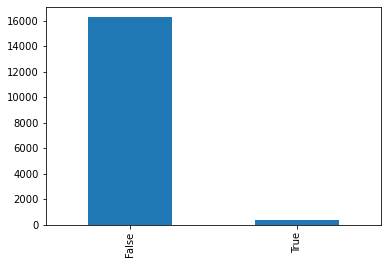

In [37]:
var = 'mau'
grafico_barras = df[var].value_counts().plot.bar()

### <span style="color:blue">Tarefa 01 - gráfico de barras</span>
<span style="color:blue"> Com base no código da célula anterior, construa um gráfico de barras para pelo menos duas outras variáveis. 
**Dica:** Não tente usar as variáveis ```tempo_emprego``` e ```idade``` pois o gráfico de barras dessa forma como construímos não é adequado para elas. </span>

In [63]:
df_adim = df[df['mau'] == False]
df_inadim = df[df['mau'] == True]

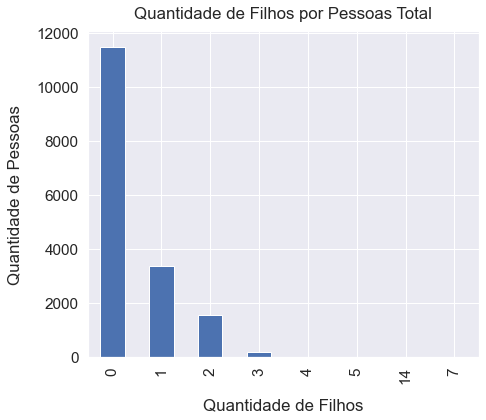

In [98]:
sns.set(font_scale=1.4)

var = 'qtd_filhos'
grafico_barras = df[var].value_counts().plot(kind='bar', figsize=(7, 6))

plt.xlabel('Quantidade de Filhos', labelpad=14)
plt.ylabel("Quantidade de Pessoas", labelpad=14)
plt.title("Quantidade de Filhos por Pessoas Total", y=1.02);

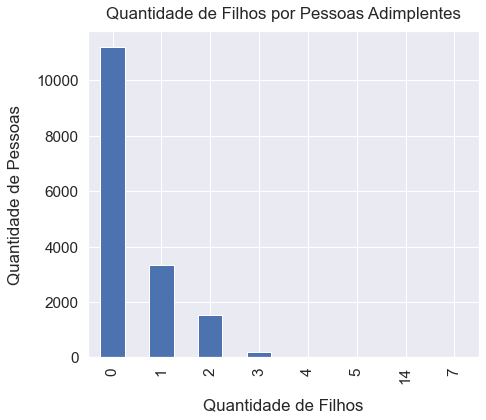

In [96]:
sns.set(font_scale=1.4)

var = 'qtd_filhos'
grafico_barras = df_adim[var].value_counts().plot(kind='bar', figsize=(7, 6))

plt.xlabel('Quantidade de Filhos', labelpad=14)
plt.ylabel("Quantidade de Pessoas", labelpad=14)
plt.title("Quantidade de Filhos por Pessoas Adimplentes", y=1.02);

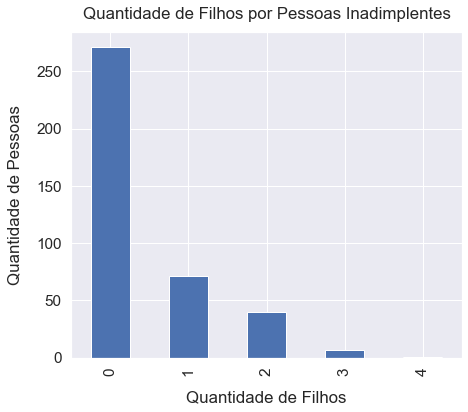

In [97]:
sns.set(font_scale=1.4)

var = 'qtd_filhos'
grafico_barras = df_inadim[var].value_counts().plot(kind='bar', figsize=(7, 6))

plt.xlabel('Quantidade de Filhos', labelpad=14)
plt.ylabel("Quantidade de Pessoas", labelpad=14)
plt.title("Quantidade de Filhos por Pessoas Inadimplentes", y=1.02);

> Análise se tipo de Quantidade de Filhos pode impactar na taxa de inadimplencia como os graficos seguem o padrão não tem nenhum insight relevante aqui.

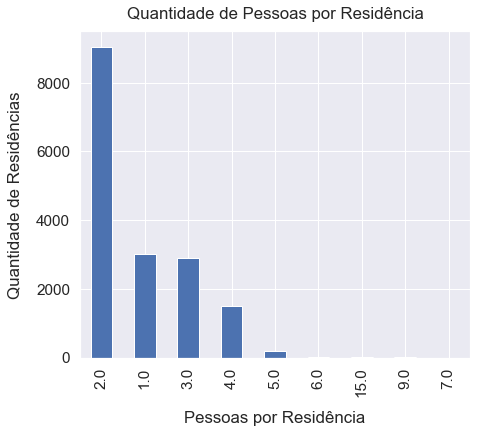

In [93]:
sns.set(font_scale=1.4)

var = 'qt_pessoas_residencia'
grafico_barras = df[var].value_counts().plot(kind='bar', figsize=(7, 6))

plt.xlabel('Pessoas por Residência', labelpad=14)
plt.ylabel("Quantidade de Residências", labelpad=14)
plt.title("Quantidade de Pessoas por Residência", y=1.02);

> Análise se tipo de Quantidade de Pessoas na residência pode impactar na taxa de inadimplencia como os graficos seguem o padrão não tem nenhum insight relevante aqui.

In [54]:
def graph_analize(coluna: str, titulos: list, dfs: list):
  eixo = 0
  max_y = 0
  max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

  # configurando os gráficos
  figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

  for dataframe in dfs:
    df_to_plot = dataframe[coluna].value_counts().to_frame()

    df_to_plot.rename(
        columns={coluna: 'frequencia_absoluta'},
        inplace=True
    )
    df_to_plot[coluna] = df_to_plot.index
    
    df_to_plot.sort_values(
        by=[coluna],
        inplace=True
    )
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(
      x=df_to_plot[coluna],
      y=df_to_plot['frequencia_absoluta'],
      ax=eixos[eixo]
    )

    f.set(
      title=titulos[eixo],
      xlabel=coluna.capitalize(),
      ylabel='Frequência Absoluta'
    )

    f.set_xticklabels(
      labels=f.get_xticklabels(),
      rotation=90
    )
    _, max_y_f = f.get_ylim()
    
    max_y = max_y_f if max_y_f > max_y else max_y
    
    f.set(ylim=(0, max_y))
    
    eixo += 1

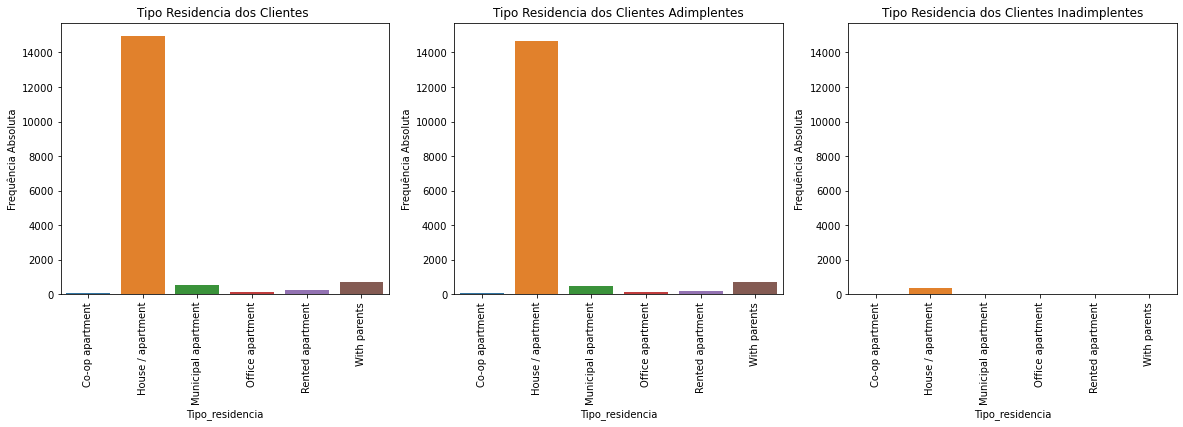

In [57]:
coluna = 'tipo_residencia'

title = coluna.replace('_', ' ').title()
titulos = ["{} dos Clientes {}".format(title, type_client) for type_client in ["", "Adimplentes", "Inadimplentes"]]

dfs = [df, df_adim, df_inadim]

graph_analize(coluna=coluna, titulos=titulos, dfs=dfs)

> Análise se tipo de Residencia pode impactar na taxa de inadimplencia como os graficos seguem o padrão não tem nenhum insight relevante aqui.

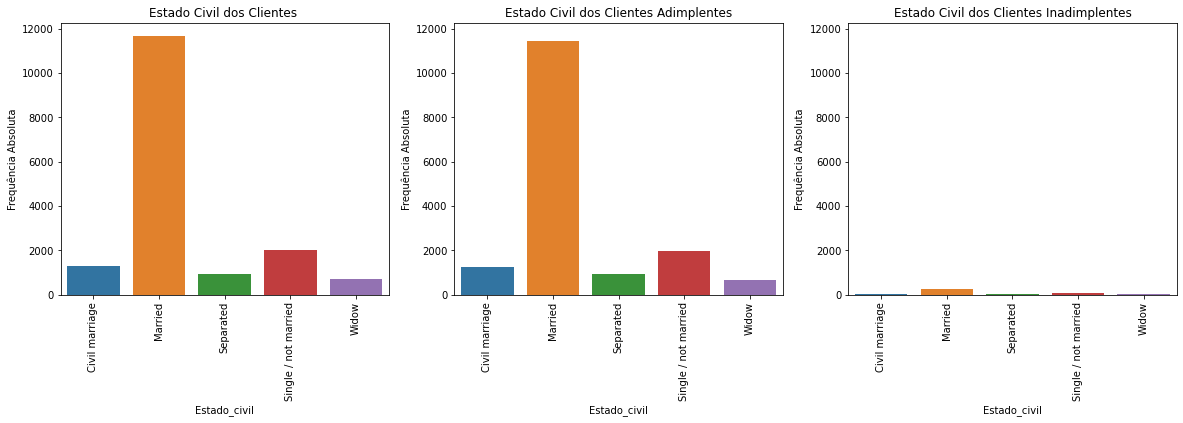

In [58]:
coluna = 'estado_civil'

title = coluna.replace('_', ' ').title()
titulos = ["{} dos Clientes {}".format(title, type_client) for type_client in ["", "Adimplentes", "Inadimplentes"]]

dfs = [df, df_adim, df_inadim]

graph_analize(coluna=coluna, titulos=titulos, dfs=dfs)

> Análise se tipo de Estado Cívil pode impactar na taxa de inadimplencia como os graficos seguem o padrão não tem nenhum insight relevante aqui.

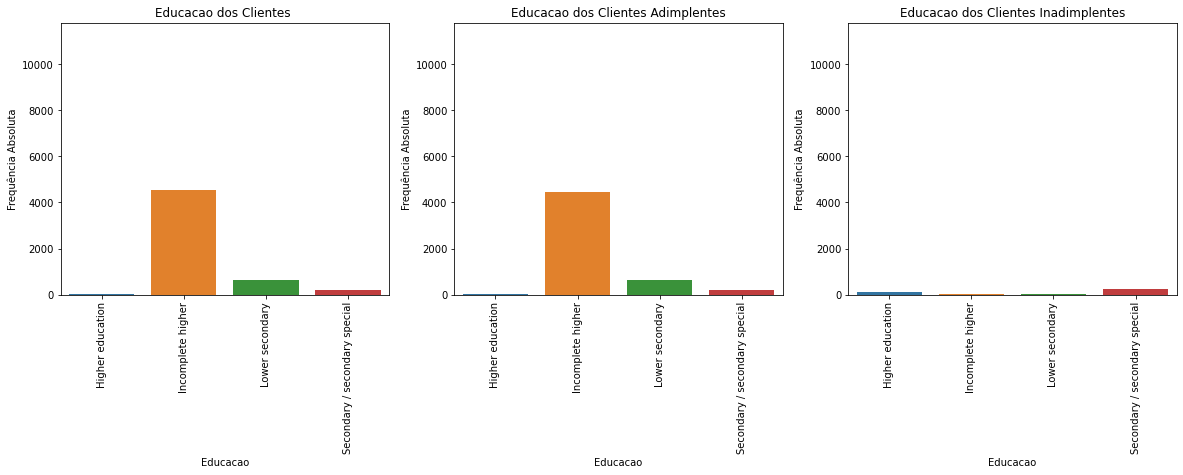

In [59]:
coluna = 'educacao'

title = coluna.replace('_', ' ').title()
titulos = ["{} dos Clientes {}".format(title, type_client) for type_client in ["", "Adimplentes", "Inadimplentes"]]

dfs = [df, df_adim, df_inadim]

graph_analize(coluna=coluna, titulos=titulos, dfs=dfs)

> Análise se tipo de Estado Cívil pode impactar na taxa de inadimplencia como os graficos seguem o padrão não tem nenhum insight relevante aqui.

<Figure size 432x288 with 0 Axes>

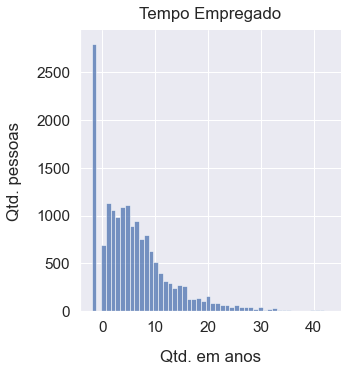

In [128]:
plt.clf()
var = "tempo_emprego"

sns.displot(df, x = var, bins = 50)

plt.xlabel('Qtd. em anos', labelpad=14)
plt.ylabel("Qtd. pessoas", labelpad=14)
plt.title("Tempo Empregado", y=1.02);

plt.show()

In [118]:
# Alterando valores de -1000 pra -2, para visualizar melhor no gráfico
var = "tempo_emprego"
df.loc[df[var] < 0,var] = -2

<Figure size 432x288 with 0 Axes>

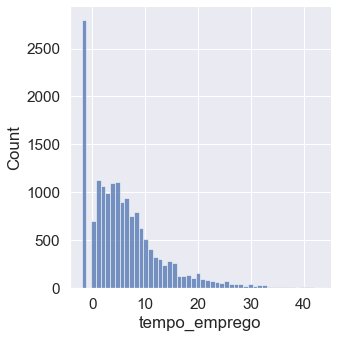

In [119]:
plt.clf()
var = "tempo_emprego"

sns.displot(df, x = var, bins = 50)
plt.show()

### <span style="color:blue">Tarefa 02 - Histograma </span>
<span style="color:blue"> Com base no código da célula anterior, construa o histograma da variavel ```idade```.  </span>


<Figure size 432x288 with 0 Axes>

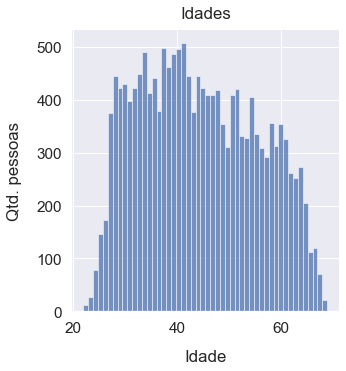

In [132]:
plt.clf()
var = "idade"

sns.displot(df, x = var, bins = 50)

plt.xlabel('Idade', labelpad=14)
plt.ylabel("Qtd. pessoas", labelpad=14)
plt.title("Idades", y=1.02);

plt.show()

### Entendimento dos dados - Bivariadas

Entender a alteração da inadimplência indicada pela variável resposta (```AtrasoRelevante2anos```) e as variáveis explicativas (demais). Para isto, vamos calcular a taxa de inadimplentes (qtd inadimplentes / total) para diferentes grupos definidos pelas variáveis explicativas.


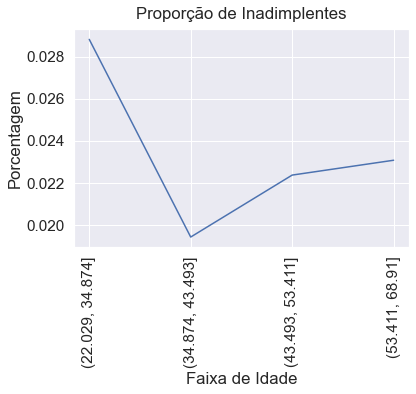

In [154]:
var = 'idade'

cat_srs, bins = pd.qcut(df[var], 4, retbins=True)

g = df.groupby(cat_srs)

biv = g['mau'].mean()

ax = biv.plot.line()

ax.set_title("Proporção de Inadimplentes", y=1.02);
ax.set_xlabel("Faixa de Idade")
ax.set_ylabel("Porcentagem")

ticks = plt.xticks(
    range(len(biv.index.values)),
    biv.index.values,
    rotation=90
)

### <span style="color:blue">Tarefa 03 - Bivariada </span>
<span style="color:blue"> Com base no código da célula anterior, construa uma análise bivariada para a variável  ```tempo_emprego```.  Em seguida, insira uma célula de markdown e conclua se a variável parece discriminar risco de crédito. </span>



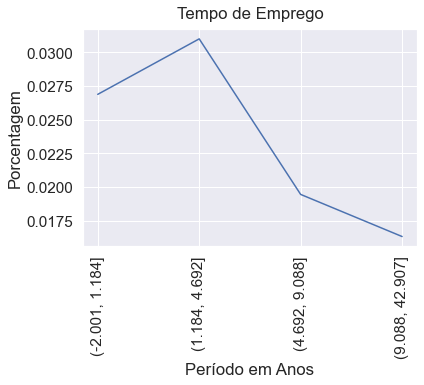

In [157]:
var = 'tempo_emprego'

cat_srs, bins = pd.qcut(df[var], 4, retbins=True)

g = df.groupby(cat_srs)

biv = g['mau'].mean()

ax = biv.plot.line()

ax.set_title("Tempo de Emprego", y=1.02);
ax.set_xlabel("Período em Anos")
ax.set_ylabel("Porcentagem")

ticks = plt.xticks(
    range(len(biv.index.values)),
    biv.index.values,
    rotation=90
)

Analisando o gráfico acima, podemos supor que o período de 1 a 4 anos de emprego pode ter uma maior tendência a Inadimplência.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:
- seleção
Neste caso, os dados já estão pré-selecionados
- limpeza
Precisaremos identificar e tratar dados faltantes
- construção
Neste primeiro exercício não faremos construção de novas variáveis
- integração
Temos apenas uma fonte de dados, não é necessário agregação
- formatação
Os dados já se encontram em formatos úteis

Os dados já estão pré-selecionados, construídos e integrados, mas há dados faltantes que serão eliminados na próxima célula

In [159]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())
    
metadata

,tipo,n_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


In [160]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [161]:
for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

In [168]:
df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,0,0,0,0,0,0,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,0,1,0,0,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,0,1,0,0,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,0,0,0,0,0,0,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,0,...,0,1,0,0,0,0,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,0,...,0,0,0,0,0,0,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,0,0,0,0,0,0,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,0,0,0,0,0,0,0,0,0,0


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
Utilizaremos a técnica de floresta aleatória (**random forest**), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como estas. Vamos ver esse algoritmo em detalhes mais adiante no curso, mas pense nele por enquanto como uma regra complexa baseada nas variáveis explicativas que classifica o indivíduo como inadimplente ou não. Mais adiante no curso vamos extrair mais dessa técnica.
- Desenho do teste
Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada ```treinamento```, onde o algoritmo 'aprende', e outra chamada ```teste```, onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo, falaremos mais detalhes em lições futuras.
- Avaliação do modelo
Faremos a avaliação do nosso modelo através do percentual de acerto, avaliando a classificação do modelo (inadimplente e não inadimplente) e comparando com o estado real armazenado na variável resposta (```AtrasoRelevante2anos```). Esse percentual de acerto é frequentemente chamado de acurácia (**obs:** nunca usar assertividade... a**ss**ertivo não é aquele que a**c**erta, e sim "*adj.: em que o locutor declara algo, positivo ou negativo, do qual assume inteiramente a validade; declarativo*." a**C**ertivo está errado ;)
#### Dividindo a base em treino e teste



In [169]:
# Tirando a variável resposta da base de treinamento
x = df.drop("mau", axis = 1)
y = df["mau"]

# Tirando ID da base de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [170]:
x_train

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
8981,0,62.189041,7.619178,1,1,1,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
14309,0,46.665753,4.202740,1,0,0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
11169,0,47.868493,-2.000000,1,0,0,1,2.0,0,0,...,0,0,0,0,0,0,1,0,0,0
9608,0,62.947945,-2.000000,1,0,0,0,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
5709,0,61.389041,5.956164,1,0,0,0,2.0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13505,2,41.452055,14.854795,1,1,1,0,4.0,0,1,...,0,0,0,0,0,0,0,0,0,0
7384,0,45.695890,1.213699,1,0,0,0,2.0,0,1,...,0,1,0,0,0,0,0,0,0,0
3668,0,51.879452,25.315068,1,0,0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4596,0,36.884932,2.101370,1,0,0,0,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Rodando o modelo
A função RandomForestClassifier gera a estrutura da floresta aleatória, e o parâmetro ```n_estimator``` define o número de árvores na floresta. Normalmente a acurácia do modelo tende a aumentar com o número de árvores, pelo menos até um certo limite - e aumenta também o recurso computacional demandado. Você pode alterar esse parâmetro e verificar se a acurácia do seu modelo melhora - não recomendamos valores muito altos. Vá alterando aos poucos e percebendo como o tempo aumenta com os seus recursos. Não é necessário ir muito além de umas 100 árvores.

In [171]:
# Treinar uma Random Forest com 5 árvores

clf = RandomForestClassifier(n_estimators=3)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=3)

In [172]:
# Calculando a acuracia

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.38%


In [173]:
# Matriz de confusão

tab = pd.crosstab(index = y_pred, columns = y_test)
print(tab[1][0]/(tab[1][0] + tab[0][0]))
print(tab[1][1]/(tab[1][1] + tab[0][1]))
tab

0.021101139946640795
0.45


mau,False,True
row_0,,
False,4036,87
True,22,18


### <span style="color:blue">Tarefa 04 - Bivariada </span>
<span style="color:blue"> Para essa tarefa, crie três células extras, copie nelas o código das três células anteriores (na mesma ordem) e altere o parâmetro ```n_estimators=``` da função ```RandomForestClassifier``` e insira uma quantidade maior que 3 nesse parâmetro. Rode as três células anteriores para calcular a acurácia do modelo e veja se você consegue uma acurácia melhor. </span>

In [200]:
# Treinar uma Random Forest com 5 árvores

clf = RandomForestClassifier(n_estimators=90)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=90)

In [201]:
# Calculando a acuracia

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)

print('Acurácia: {0:.2f}%'.format(acc * 100))

Acurácia: 97.50%


In [202]:
# Matriz de confusão

tab = pd.crosstab(index = y_pred, columns = y_test)

print(tab[1][0]/(tab[1][0] + tab[0][0]))
print(tab[1][1]/(tab[1][1] + tab[0][1]))

tab

0.02061105722599418
0.5128205128205128


mau,False,True
row_0,,
False,4039,85
True,19,20


## Etapa 5 Crisp-DM: Avaliação dos resultados
A etapa final do CRISP. Neste casp, a nossa avaliação termina com a acurácia. Mas em problemas futuros aprofundaremos mais - a ideia seria avaliar o impacto do uso do modelo no negócio, ou seja, o quanto o resultado financeiro melhora em detrimento da utilização do modelo.

Como um exemplo simples, considere que um cliente bom pagador deixa (em média) 5 '*dinheiros*' de lucro, e um mau pagador deixa (em média) 100 '*dinheiros*' de prejuízo.

de acordo com a matriz de confusão:

| Decisão   | lucro dos bons    | lucro dos maus | total  |
| --------- |:-----------------:|:--------------:| ------:|
| Aprovador | 4039 x 5          | 19 x (-100)    | 13.010 |
| Reprovar  |  85 x 5           | 20 x (-100)    | -2.065 |

Estariamos evitando, portanto, um prejuízo de -2.145 '*dinheiros*' - o que na prática significa um aumento no lucro.


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor de crédito que toma as decisões com algum nível de automação - tipicamente aprovando automaticamente clientes muito bons, negando automaticamente clientes muito ruins, e enviando os intermediários para análise manual.